In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv(".//csv//Student Depression Dataset.csv")
print(df.columns)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [3]:
print(df.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

### Бизнес-цель исследования
Разработать и внедрить систему прогнозирования уровня депрессии среди обучающихся, которая позволит выявить группы риска на ранних этапах. Результаты исследования могут быть полезны психологам, педагогам и администрации учебных заведений.


### Описание набора данных для анализа
Набор данных содержит информацию о психологическом состоянии обучающихся и включает следующие поля:
- id – идентификатор, число
- Gender – пол, строка
- Age – возраст, дробное число
- City – город, строка
- Profession – профессия, строка
- Academic Pressure – академическое давление, дробное число (от 1.00 до 5.00)
- Work Pressure – рабочее давление, дробное число (от 1.00 до 5.00)
- CGPA – средний балл (GPA), дробное число
- Study Satisfaction – удовлетворенность учебой, дробное число (от 1.00 до 5.00)
- Job Satisfaction – удовлетворенность работой, дробное число (от 1.00 до 5.00)
- Sleep Duration – продолжительность сна, строка
- Dietary Habits – пищевые привычки, строка
- Degree – степень (образование), строка
- Have you ever had suicidal thoughts? – Были ли у вас когда-либо суицидальные мысли? строка (yes/no)
- Work/Study Hours – часы работы/учебы, дробное число
- Financial Stress – финансовый стресс, дробное число (от 1.00 до 5.00)
- Family History of Mental Illness – семейный анамнез психических заболеваний, строка (yes/no)
- Depression – депрессия, булевое значение (1/0)


### Обработка данных

In [4]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
df.dropna(subset=['Financial Stress'], inplace=True)

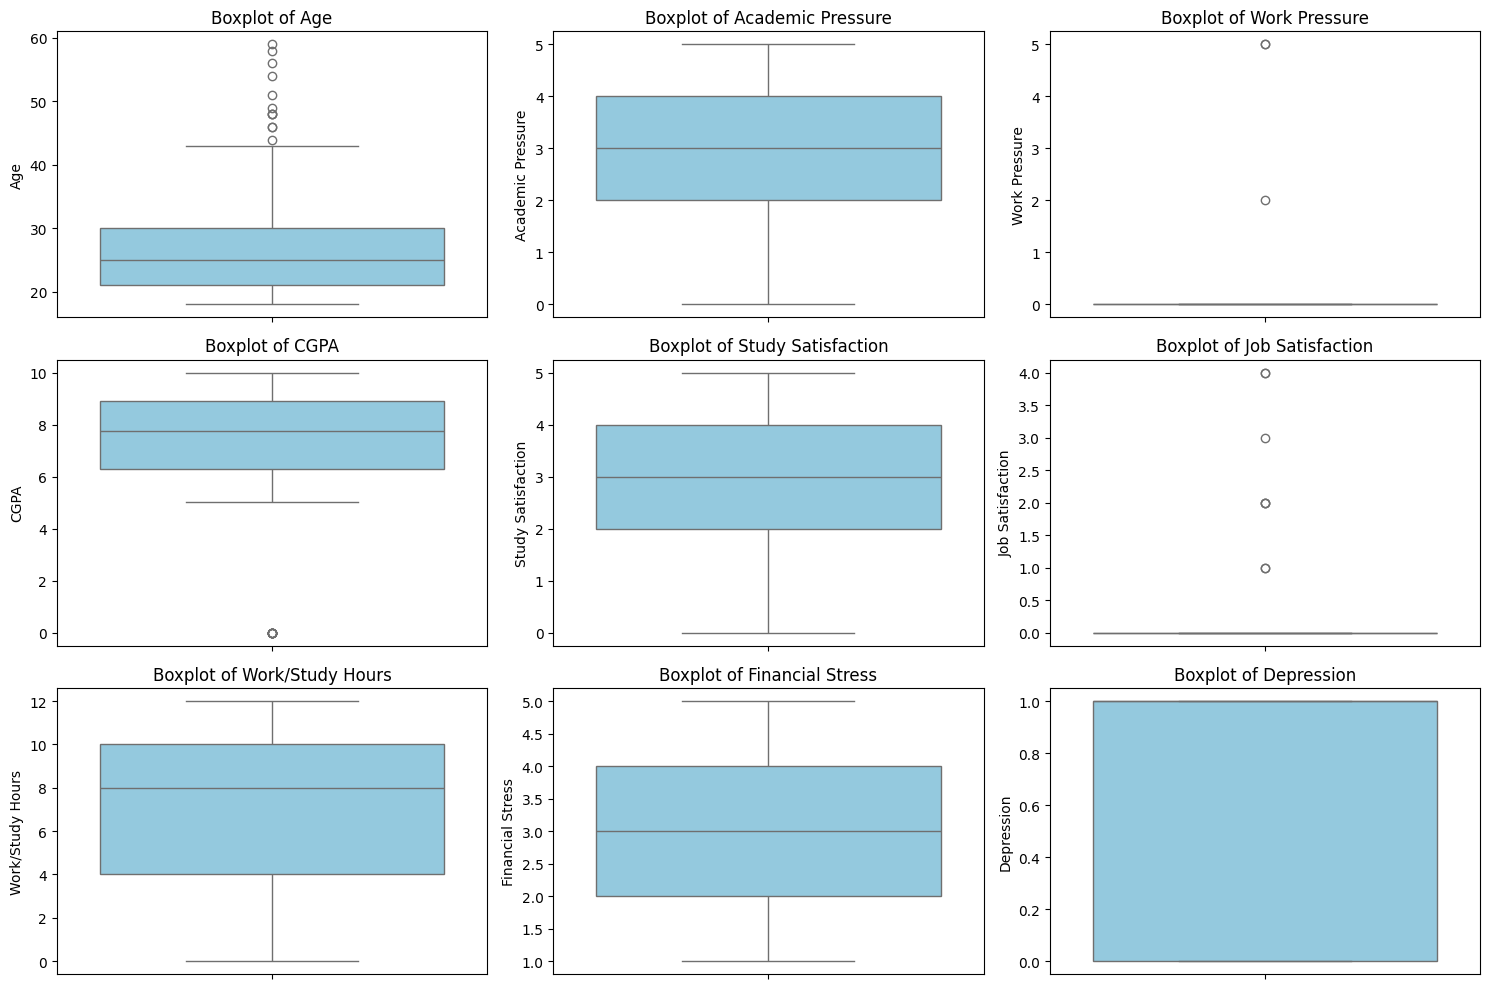

In [6]:
features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                      'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

В Age много выбросов. Сбалансируем данные

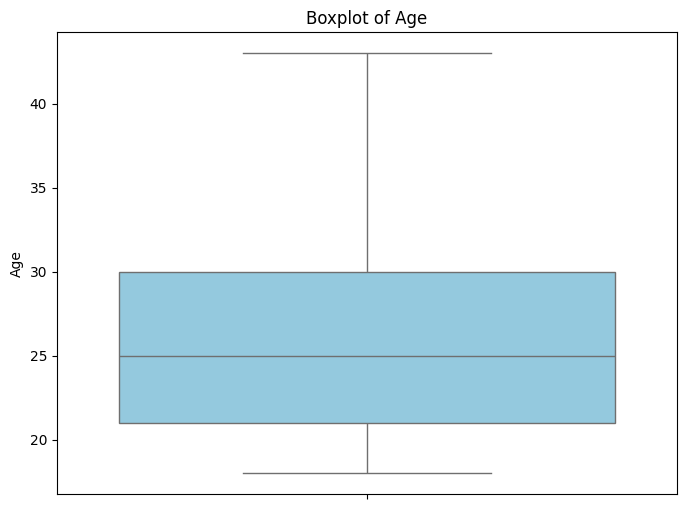

In [7]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5 * IQR
outliers = (df['Age'] < (Q1 - threshold)) | (df['Age'] > (Q3 + threshold))

median_rating = df['Age'].median()
df.loc[outliers, 'Age'] = median_rating

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

### Конструирование признаков с помощью меток

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['Dietary Habits'] = le.fit_transform(df['Dietary Habits'])
df['Degree'] = le.fit_transform(df['Degree'])
df['Have you ever had suicidal thoughts ?'] = le.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Sleep Duration'] = le.fit_transform(df['Sleep Duration'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Study Satisfaction'] = le.fit_transform(df['Study Satisfaction'])
df['Family History of Mental Illness'] = le.fit_transform(df['Family History of Mental Illness'])

разделение на признаки и целевую переменную

In [9]:
x = df.drop('Depression', axis=1)
y = df['Depression']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Создание конвейера

# Обработаем данные
# Определим категориальные и числовые признаки
categorical_features = ['Gender', 'City', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Profession', 'Family History of Mental Illness', 'Sleep Duration']
numerical_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Построим модели
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso())
])

pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

### 1) Метод регрессии Лассо


In [1]:
from sklearn.linear_model import Lasso

param_grid_lasso = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0],
    'model__fit_intercept': [True, False],
}

# Создание объекта GridSearchCV
grid_search_lasso = GridSearchCV(
    estimator=Lasso(),  
    param_grid=param_grid_lasso,  
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1 
)

grid_search_lasso.fit(x_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры для Lasso:")
print(grid_search_lasso.best_params_)

Лучшие гиперпараметры для Lasso:
{'model__alpha': 0.01, 'model__fit_intercept': False}


### 2) Метод градиентного бустинга

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_gb.fit(x_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры для Gradient Boosting:")
print(grid_search_gb.best_params_)

Лучшие гиперпараметры для Gradient Boosting:
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}


### 3) Метод k-ближайших соседей

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 10],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_knn.fit(x_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры для k-Nearest Neighbors:")
print(grid_search_knn.best_params_)

Лучшие гиперпараметры для k-Nearest Neighbors:
{'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


### Предсказание на тестовой выборке

In [128]:
y_pred_lasso = grid_search_lasso.predict(x_test)
y_pred_forest = grid_search_gb.predict(x_test)
y_pred_neighbors = grid_search_knn.predict(x_test)

### Оценка качества модели

1.	MSE  (Mean Squared Error)
Среднее значение квадратов разностей между предсказанными и фактическими значениями. Чем меньше значение, тем лучше модель.

In [156]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred_forest)
mse3 = mean_squared_error(y_test, y_pred_lasso)
mse4 = mean_squared_error(y_test, y_pred_gb)
mse5 = mean_squared_error(y_test, y_pred_neighbors)

mse1_rounded = round(mse1, 3)
mse2_rounded = round(mse2, 3)
mse3_rounded = round(mse3, 3)
mse4_rounded = round(mse4, 3)
mse5_rounded = round(mse5, 3)

print("Mean Squared Error (MSE):")
print(f"k-NN: \t\t\t{mse1_rounded}")
print(f"Random Forest: \t\t{mse2_rounded}")
print(f"Lasso: \t\t\t{mse3_rounded}")
print(f"Gradient Boosting: \t{mse4_rounded}")
print(f"k-Nearest Neighbors: \t{mse5_rounded}")

Mean Squared Error (MSE):
k-NN: 			0.213
Random Forest: 		0.118
Lasso: 			0.166
Gradient Boosting: 	0.113
k-Nearest Neighbors: 	0.326


2.	MAE
Среднее значение абсолютных разностей между предсказанными и фактическими значениями. Чем меньше значение, тем лучше модель.

In [155]:
from sklearn.metrics import mean_absolute_error

mae1 = round(mean_absolute_error(y_test, y_pred),3)
mae2 = round(mean_absolute_error(y_test, y_pred_forest),3)
mae3 = round(mean_absolute_error(y_test, y_pred_lasso),3)
mae4 = round(mean_absolute_error(y_test, y_pred_gb),3)
mae5 = round(mean_absolute_error(y_test, y_pred_neighbors),3)
print("Mean Absolute Error (MAE):")
print(f"k-NN: \t\t\t{mae1}")
print(f"Random Forest: \t\t{mae2}")
print(f"Lasso: \t\t\t{mae3}")
print(f"Gradient Boosting: \t{mae4}")
print(f"k-Nearest Neighbors: \t{mae5}")

Mean Absolute Error (MAE):
k-NN: 			0.213
Random Forest: 		0.238
Lasso: 			0.366
Gradient Boosting: 	0.246
k-Nearest Neighbors: 	0.485


3.	R-squared
Мера, показывающая, насколько хорошо модель объясняет изменчивость данных. Значение находится в диапазоне от 0 до 1, где 1 — идеальное соответствие, а 0 — модель не объясняет данные.

In [153]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² (R-squared): {r2}")

r2_1 = r2_score(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred_forest)
r2_3 = r2_score(y_test, y_pred_lasso)
r2_4 = r2_score(y_test, y_pred_gb)
r2_5 = r2_score(y_test, y_pred_neighbors)

r2_1_rounded = round(r2_1, 3)
r2_2_rounded = round(r2_2, 3)
r2_3_rounded = round(r2_3, 3)
r2_4_rounded = round(r2_4, 3)
r2_5_rounded = round(r2_5, 3)

print("\nR² (R-squared):")
print(f"k-NN: \t\t\t{r2_1_rounded}")
print(f"Random Forest: \t\t{r2_2_rounded}")
print(f"Lasso: \t\t\t{r2_3_rounded}")
print(f"Gradient Boosting: \t{r2_4_rounded}")
print(f"k-Nearest Neighbors: \t{r2_5_rounded}")

R² (R-squared): 0.127933821917115

R² (R-squared):
k-NN: 			0.128
Random Forest: 		0.515
Lasso: 			0.319
Gradient Boosting: 	0.537
k-Nearest Neighbors: 	-0.337


4.	RMSE
 Среднее отклонение предсказаний от реальных данных. Чем меньше модуль, тем лучше модель.

In [151]:
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)

rmse1_rounded = round(rmse1, 3)
rmse2_rounded = round(rmse2, 3)
rmse3_rounded = round(rmse3, 3)
rmse4_rounded = round(rmse4, 3)
rmse5_rounded = round(rmse5, 3)

print("Root Mean Squared Error (RMSE):")
print(f"k-NN: \t\t\t{rmse1_rounded}")
print(f"Random Forest: \t\t{rmse2_rounded}")
print(f"Lasso: \t\t\t{rmse3_rounded}")
print(f"Gradient Boosting: \t{rmse4_rounded}")
print(f"k-Nearest Neighbors: \t{rmse5_rounded}")

Root Mean Squared Error (RMSE):
k-NN: 			0.461
Random Forest: 		0.344
Lasso: 			0.407
Gradient Boosting: 	0.336
k-Nearest Neighbors: 	0.571


Лучший результат – градиентный бустинг и случайный лес.
Положительные результаты по всем критериям получил случайный лес. Три из четырех положительных результата у градиентного бустинга. 

Значит, случайный лес – наиболее точная и устойчивая стратегия обучения модели. Итоговая модель – model_forest.

Также, с помощью применение важности признаков (feature importance) на Случайном лесе, мы вывели основные факторы, вызывающие депрессию:

In [19]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

feature_importances = model_rf.feature_importances_

import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                  Feature  Importance
13  Have you ever had suicidal thoughts ?    0.300542
5                       Academic Pressure    0.134276
0                                      id    0.087970
7                                    CGPA    0.079078
2                                     Age    0.066613
15                       Financial Stress    0.066330
3                                    City    0.059293
14                       Work/Study Hours    0.052275
12                                 Degree    0.049539
8                      Study Satisfaction    0.032944
11                         Dietary Habits    0.026140
10                         Sleep Duration    0.024435
16       Family History of Mental Illness    0.010547
1                                  Gender    0.009627
4                              Profession    0.000372
9                        Job Satisfaction    0.000017
6                           Work Pressure    0.000003
